* Done By: Yasmeen Toukhy
* Batch : SEPT BATCH A3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
imdp = pd.read_csv('IMDb_Movies_India.csv', encoding='ISO-8859-1')

In [ ]:
print(f"Dataset rows are {len(imdp)} rows")
print(imdp.shape) #finding size of dataframe

Dataset rows are 15509 rows
(15509, 10)


In [ ]:
imdp

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imdp.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
def null_data_percent():
    return pd.DataFrame({
    'Missing Values': imdp.isna().sum().values,
    'Percentage': ((imdp.isna().sum()/len(imdp)) * 100).apply(lambda x: f'{x:.2f}%')
}, index=imdp.columns)

In [ ]:
null_data_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


Dropping the column Actor 2 and Actor 3 since is they high % of missing values & wont effect on ratings

In [ ]:
imdp.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [ ]:
# Keeps only  rows <=5 of NaN values
imdp = imdp[(imdp.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]

<ipython-input-172-b9c4017d3e77>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imdp = imdp[(imdp.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]


In [ ]:
null_data_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,494,3.20%
Duration,8219,53.17%
Genre,1846,11.94%
Rating,7540,48.77%
Votes,7539,48.77%
Director,482,3.12%
Actor 1,1567,10.14%


In [ ]:
imdp.dropna(subset=['Duration','Rating','Votes'],inplace=True)

<ipython-input-174-74ae8b1e9c0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp.dropna(subset=['Duration','Rating','Votes'],inplace=True)


In [ ]:
null_data_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,31,0.53%
Rating,0,0.00%
Votes,0,0.00%
Director,1,0.02%
Actor 1,75,1.28%


In [ ]:
imdp.Director.describe()

count             5850
unique            2549
top       David Dhawan
freq                41
Name: Director, dtype: object

In [ ]:
imdp.groupby('Director').Director.count().sort_values(ascending=False)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
Kathir                   1
Kashmira Shah            1
Kashinath                1
Kasam Ali                1
Zunaid Memon             1
Name: Director, Length: 2549, dtype: int64

In [ ]:
imdp['Director'].fillna('David Dhawan',inplace=True)

<ipython-input-178-a2d2cc6f20a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Director'].fillna('David Dhawan',inplace=True)


In [ ]:
null_data_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,31,0.53%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,75,1.28%


In [ ]:
imdp.groupby('Genre').Genre.count().sort_values(ascending=False)

Genre
Drama                            870
Drama, Romance                   334
Action, Crime, Drama             329
Action, Drama                    207
Comedy, Drama                    206
                                ... 
Documentary, Adventure, Crime      1
Documentary, Adventure, Music      1
Documentary, Biography, Music      1
Documentary, Comedy, Drama         1
Crime, Musical, Mystery            1
Name: Genre, Length: 393, dtype: int64

In [ ]:
## fill genre null columns with drama
imdp['Genre'].fillna('Drama',inplace=True)

<ipython-input-181-4ec9b9910d20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Genre'].fillna('Drama',inplace=True)


In [ ]:
null_data_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,75,1.28%


In [ ]:
imdp['Actor 1'].describe()

count                 5776
unique                2046
top       Amitabh Bachchan
freq                   104
Name: Actor 1, dtype: object

In [ ]:
imdp['Actor 1'].fillna('Amitabh Bachchan', inplace=True)

<ipython-input-184-8afce84c0efb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Actor 1'].fillna('Amitabh Bachchan', inplace=True)


In [ ]:
null_data_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,0,0.00%


In [ ]:
imdp

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar


In [ ]:
imdp['Year'] = imdp['Year'].str.replace(r'[()]', '', regex=True)
imdp['Duration'] = imdp['Duration'].str.replace(r' min', '', regex=True)

<ipython-input-187-619644b97d57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Year'] = imdp['Year'].str.replace(r'[()]', '', regex=True)
<ipython-input-187-619644b97d57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Duration'] = imdp['Duration'].str.replace(r' min', '', regex=True)


In [ ]:
imdp['Year'] = imdp['Year'].astype('int')
imdp['Duration'] = imdp['Duration'].astype('int')
imdp['Votes'] = imdp['Votes'].str.replace(',','')
imdp['Votes'] = imdp['Votes'].astype('int')

<ipython-input-188-a362065d4e6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Year'] = imdp['Year'].astype('int')
<ipython-input-188-a362065d4e6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Duration'] = imdp['Duration'].astype('int')
<ipython-input-188-a362065d4e6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
imdp.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


Text(0.5, 1.0, 'Number of Movies Per Year')

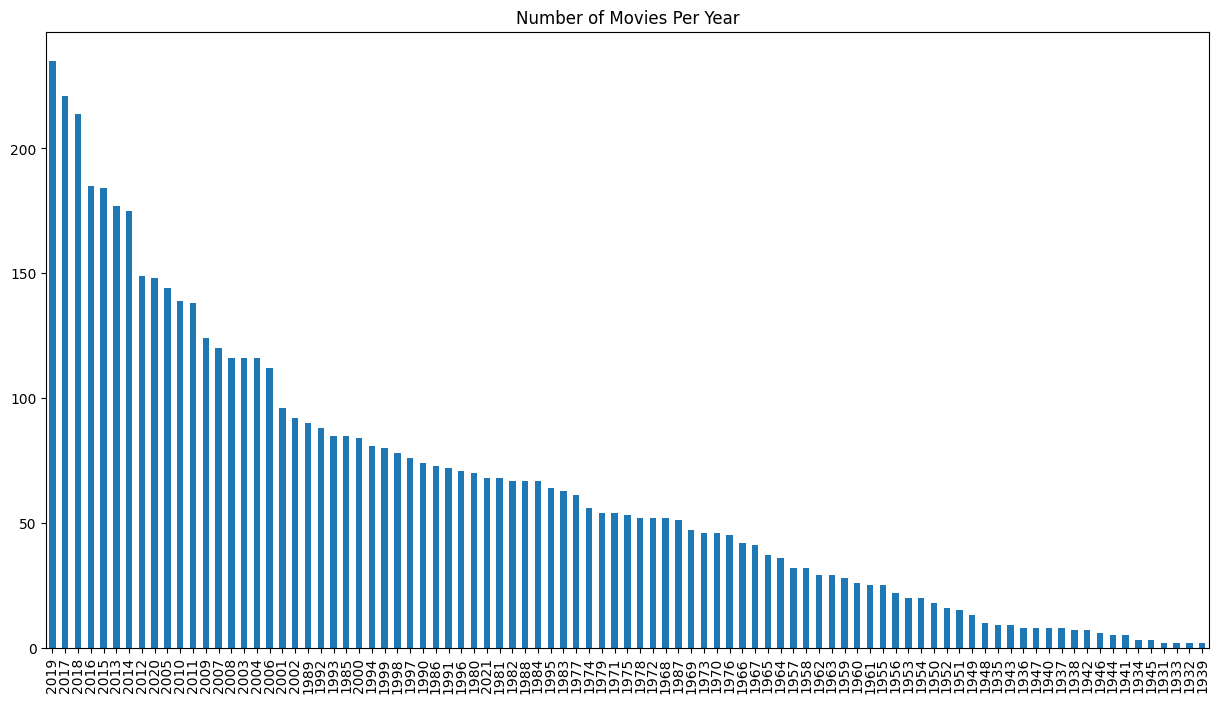

In [ ]:
plt.figure(figsize=(15,8))
imdp['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

Text(0.5, 1.0, 'Actor with Many Movies')

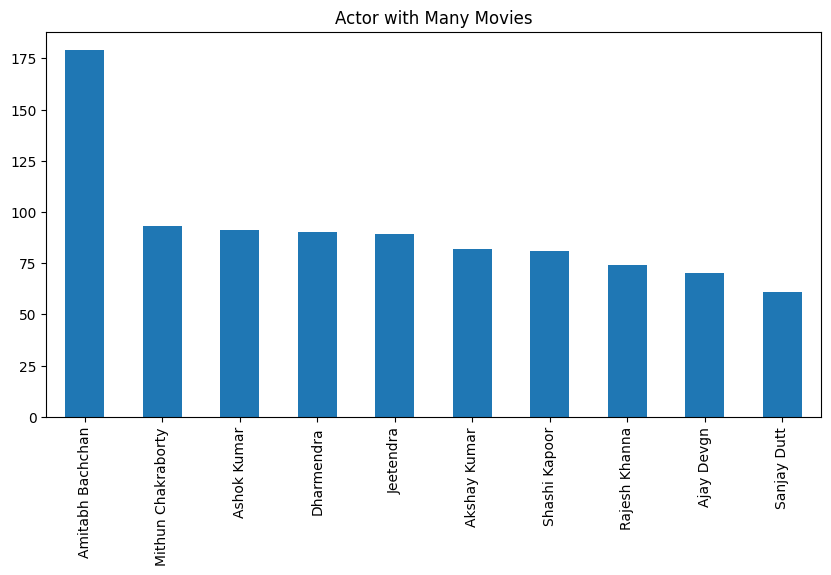

In [ ]:
plt.figure(figsize=(10,5))
imdp['Actor 1'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Actor with Many Movies')

Text(0.5, 1.0, 'Director with most Movies')

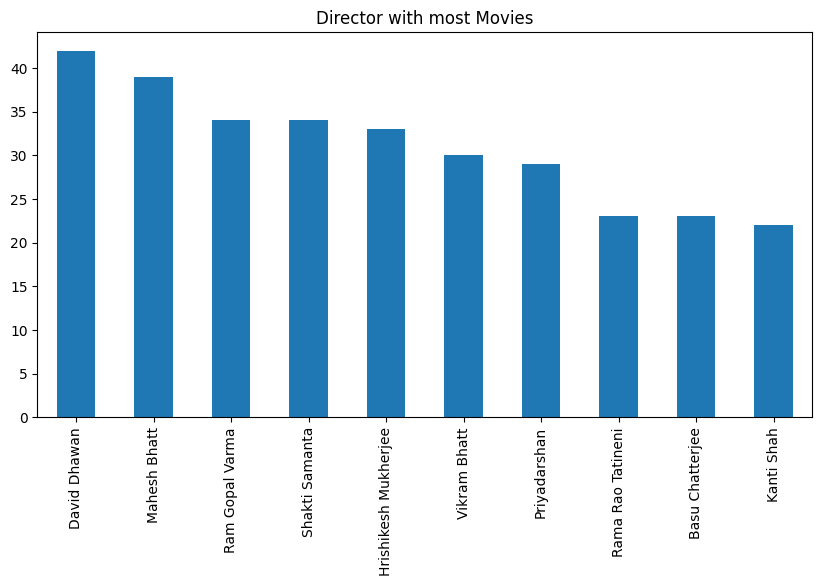

In [ ]:
plt.figure(figsize=(10,5))
imdp['Director'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Director with most Movies')

<Axes: xlabel='Genre', ylabel='Rating'>

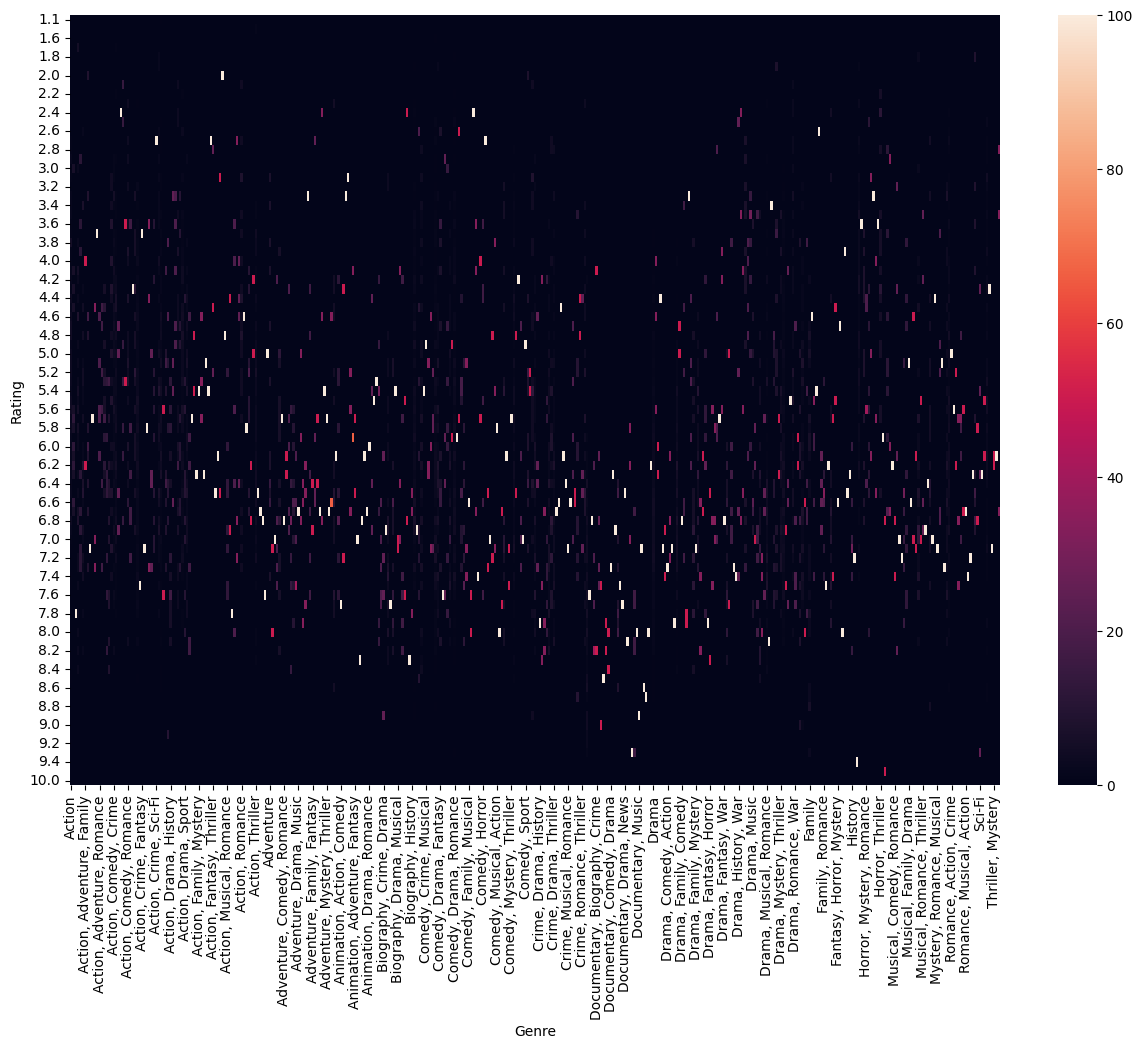

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(imdp['Rating'], imdp['Genre'], normalize='columns') * 100)

In [ ]:
genre_sum = imdp['Genre'].value_counts()
imdp['Genre_encoded'] = imdp['Genre'].map(genre_sum)

<ipython-input-194-d8026ef3fda7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Genre_encoded'] = imdp['Genre'].map(genre_sum)


In [ ]:
Rating_mean_genre=imdp.groupby('Genre')['Rating'].transform('mean')
imdp['Genre_mean_rating'] = Rating_mean_genre

<ipython-input-195-e27c6c10c24a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Genre_mean_rating'] = Rating_mean_genre


In [ ]:
Rating_mean_director = imdp.groupby('Director')['Rating'].transform('mean')
imdp['Director_encoded'] = Rating_mean_director

<ipython-input-196-e7dc6c5b9383>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Director_encoded'] = Rating_mean_director


In [ ]:
Rating_mean_actor = imdp.groupby('Actor 1')['Rating'].transform('mean')
imdp['Actor_encoded'] = Rating_mean_actor

<ipython-input-197-6206deebbe89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdp['Actor_encoded'] = Rating_mean_actor


<Axes: ylabel='Frequency'>

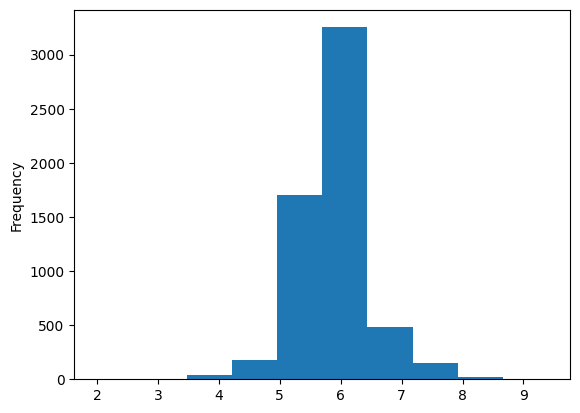

In [ ]:
imdp['Genre_mean_rating'].plot(kind='hist')

In [ ]:
X = imdp[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = imdp['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))

Root Mean Squared Error: 0.7176648127562956
Mean squared error:  0.5150427834685288
Mean absolute error:  0.512636224579155
R2 score:  0.7231721423658712
